## Implementing OLS from scratch using numpy
In this notebook we are implementing Ordinary Least Square (OLS) from scratch and test it empirically using a Monte Carlo Simulation. Given a regression equation $$ y = X \beta + \epsilon $$ where $X \in \mathbb{R}^{n \times d + 1}$,  $\beta \in \mathbb{R}^{\times d + 1}$ and $ \epsilon \in \mathbb{R}$, Ordinary Least Squares (OLS) estimate the parameter $\beta$ with 
$$ \beta = (X^T X)^{-1} X^T y $$

##### Basic Matrix operation in numpy
As the formula above shows. We will need Matrix operation for OLS. So lets first explore how these work in numpy

In [1]:
import numpy as np
# creating a numpy array for as matrix
A = np.array([[ 5, 1 ,3], 
                  [ 1, 1 ,1], 
                  [ 1, 2 ,1]])
B = np.array([1, 2, 3])
# matrix multiplication
print A.dot(B)

[16  6  8]


In [2]:
# Trasnposing
print A.T

[[5 1 1]
 [1 1 2]
 [3 1 1]]


In [3]:
# Inverse
from numpy.linalg import inv
Ainv = inv(A)
print Ainv

[[  5.00000000e-01  -2.50000000e+00   1.00000000e+00]
 [  9.25185854e-18  -1.00000000e+00   1.00000000e+00]
 [ -5.00000000e-01   4.50000000e+00  -2.00000000e+00]]


In [4]:
# cobining columns (cbind in R)
oneVector = np.ones(3) # one vector 
np.c_[np.ones(A.shape[0]),A]  

array([[ 1.,  5.,  1.,  3.],
       [ 1.,  1.,  1.,  1.],
       [ 1.,  1.,  2.,  1.]])

Now we know everything we need to know to write an ols function

In [5]:
# ols function
def ols(X,y):
    X = addOneVector(X)
    firstTerm = inv(((X.T).dot(X)))
    secondTerm = (X.T).dot(y)
    return firstTerm.dot(secondTerm)

# function to add a vector of ones for beta_0
def addOneVector(X):
    d = X.shape[0]
    return np.c_[np.ones(d), X]

Test function on artificial data

In [40]:
# create sample data
from numpy.random import randn  

data = randn(100,5) 
y = data[:,0]
X = data[:,1:]

# apply ols
beta = ols(X,y)
print beta

[ 0.01369577 -0.04620758 -0.00130127  0.04703408 -0.06696286]


Same Result can be also achive with the statsmodels library with surprisingly not much less code. 

In [46]:
from statsmodels.api import OLS

X_with_const = sm.add_constant(X)
model = OLS(y,X_with_const)
results = model.fit()
print results.summary()

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.008
Model:                            OLS   Adj. R-squared:                 -0.034
Method:                 Least Squares   F-statistic:                    0.1821
Date:                Thu, 02 Nov 2017   Prob (F-statistic):              0.947
Time:                        19:02:28   Log-Likelihood:                -145.58
No. Observations:                 100   AIC:                             301.2
Df Residuals:                      95   BIC:                             314.2
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0137      0.107      0.128      0.8

In [8]:
# get residual
def getResiduals(X,y,beta):
    X = addOneVector(X)
    return y - X.dot(beta)

def getRSS(residuals):
    return sum(res * res) # * element-wise product

res = getResiduals(X,y,beta)
rss = getRSS(res)
print rss

98.8217586212


#### Monte Carlo Simulation to assess whether the OLS 
Check if $\hat{\beta}$ is unbiased with $\hat{\beta} \rightarrow N(0,\sigma^{2}_{0})$ (Probably not rigth, determine the true beta and use the equation)

In [49]:
from numpy.random import randn, normal
repetitions = 100000
sample_size = 1000 

# the true coefficents
beta_1 = 0.5
beta_0 = 1

# empty array to store the results
beta_hat = np.empty(repetitions)

for i in range(repetitions): 
    # generate the data process
    epsilon = randn(sample_size,1)
    X = randn(sample_size,1)
    y = beta_0 + beta_1 * X + epsilon
    # ols estimation and store beta_1
    beta_hat[i] = ols(X,y)[1]

print np.mean(beta_hat), np.std(beta_hat)

0.499902486672 0.0316220910232


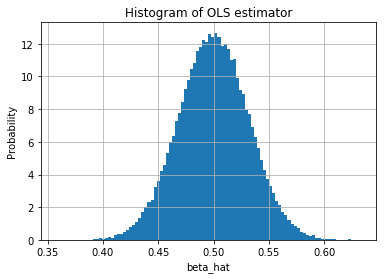

In [50]:
import matplotlib.pyplot as plt
count, bins, ignored = plt.hist(beta_hat, 100, normed=True)
plt.xlabel('beta_hat')
plt.ylabel('Probability')
plt.title('Histogram of OLS estimator')
plt.grid(True)
plt.show()

Average $\hat{\beta_1}$ converges against 0.5 which we set as the true value. Meaning that the OLS estimator is consistent.